# **CREDIT RISK SCORING - SOURCE MODEL (SM) - DEEP LEARNING - MODEL TRAINING**

## **TensorFlow Installation**

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 489.6 MB 9.6 kB/s 


# **1. Importing Python Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import os

print("Import Completed")

Import Completed


# **2. Importing the Source Model Train, Validation Input and Train Output csv Files**

In [ ]:
# Importing the Source Model (SM) Train Input Data

sm_train_X = pd.read_csv("/content/drive/MyDrive/QMUL_MSc_Project/credit_risk_scoring_project/data/source_model_final_data/sm_train_final_input_X.csv")

print("Data Import Completed")

Data Import Completed


In [ ]:
# Importing the Source Model (SM) Train Output Data

sm_train_y = pd.read_csv("/content/drive/MyDrive/QMUL_MSc_Project/credit_risk_scoring_project/data/source_model_final_data/sm_train_final_output_y.csv")

print("Data Import Completed")

Data Import Completed


In [ ]:
# Importing the Source Model (SM) Validation Input Data

sm_validation_X = pd.read_csv("/content/drive/MyDrive/QMUL_MSc_Project/credit_risk_scoring_project/data/source_model_final_data/sm_validation_final_input_X.csv")

print("Data Import Completed")

Data Import Completed


In [ ]:
# Importing the Source Model (SM) Validation Output Data

sm_validation_y = pd.read_csv("/content/drive/MyDrive/QMUL_MSc_Project/credit_risk_scoring_project/data/source_model_final_data/sm_validation_final_output_y.csv")

print("Data Import Completed")

Data Import Completed


# **3. Source Model (SM) Data Exploration**

In [ ]:
# Checking the Size of the Source Model (SM) Train Input and Output Data

print(sm_train_X.shape)
print(sm_train_y.shape)

(565726, 75)
(565726, 2)


In [ ]:
# Checking the Size of the Source Model (SM) Validation Input and Output Data

print(sm_validation_X.shape)
print(sm_validation_y.shape)

(83885, 75)
(83885, 2)


### **Source Model (SM) Train Input Data Exploration**

In [ ]:
# Sets the pandas dataframe options to display all columns/ rows.

pd.options.display.max_columns = None
#pd.options.display.max_rows = None

print("Execution Completed")

Execution Completed


In [ ]:
# Checking the first 3 column names of the dataset

sm_train_X.columns[[0, 1, 2]]

Index(['Unnamed: 0', 'pub_rec:0', 'pub_record:non_zero'], dtype='object')

In [ ]:
# Removing the first index column from the dataset

sm_train_X.drop(sm_train_X.columns[0], axis = 1, inplace = True)

print("Execution Completed")

Execution Completed


In [ ]:
# Re-checking the size of the dataset

sm_train_X.shape

(565726, 74)

In [ ]:
# Checking the datatypes of the Input Features in the Source Model (SM) Train Input Data

for feat in sm_train_X:
    print(feat, ".....", sm_train_X.dtypes[feat])

pub_rec:0 ..... int64
pub_record:non_zero ..... int64
delinq_2yrs:0 ..... int64
delinq_2yrs:1 ..... int64
delinq_2yrs:greater_than_1 ..... int64
num_tl_120dpd_2m:0 ..... int64
num_tl_120dpd_2m:non_zero ..... int64
pub_rec_bankruptcies:0 ..... int64
pub_rec_bankruptcies:non_zero ..... int64
num_tl_90g_dpd_24m:0 ..... int64
num_tl_90g_dpd_24m:non_zero ..... int64
num_accts_ever_120_pd:0 ..... int64
num_accts_ever_120_pd:_non_zero ..... int64
acc_now_delinq:0 ..... int64
acc_now_delinq:non_zero ..... int64
num_tl_30dpd:0 ..... int64
num_tl_30dpd:non_zero ..... int64
total_rec_late_fee:0 ..... int64
total_rec_late_fee:non_zero ..... int64
num_rev_tl_bal_gt_0:0 ..... int64
num_rev_tl_bal_gt_0:1_to_5 ..... int64
num_rev_tl_bal_gt_0:greater_than_5 ..... int64
percent_bc_gt_75:0 ..... int64
percent_bc_gt_75:1_to_75 ..... int64
percent_bc_gt_75:greater_than_75 ..... int64
revol_util:0 ..... int64
revol_util:1_to_30 ..... int64
revol_util:31_to_60 ..... int64
revol_util:greater_than_60 ..... int

In [ ]:
# Displying the first 5 data instances

sm_train_X.head()

,pub_rec:0,pub_record:non_zero,delinq_2yrs:0,delinq_2yrs:1,delinq_2yrs:greater_than_1,num_tl_120dpd_2m:0,num_tl_120dpd_2m:non_zero,pub_rec_bankruptcies:0,pub_rec_bankruptcies:non_zero,num_tl_90g_dpd_24m:0,num_tl_90g_dpd_24m:non_zero,num_accts_ever_120_pd:0,num_accts_ever_120_pd:_non_zero,acc_now_delinq:0,acc_now_delinq:non_zero,num_tl_30dpd:0,num_tl_30dpd:non_zero,total_rec_late_fee:0,total_rec_late_fee:non_zero,num_rev_tl_bal_gt_0:0,num_rev_tl_bal_gt_0:1_to_5,num_rev_tl_bal_gt_0:greater_than_5,percent_bc_gt_75:0,percent_bc_gt_75:1_to_75,percent_bc_gt_75:greater_than_75,revol_util:0,revol_util:1_to_30,revol_util:31_to_60,revol_util:greater_than_60,il_util:0,il_util:1_to_40,il_util:greater_than_40,max_bal_bc:0,max_bal_bc:1_to_5000,max_bal_bc:5001_to_10000,max_bal_bc:greater_than_10000,mo_sin_old_rev_tl_op:less_than_6months,mo_sin_old_rev_tl_op:7months_to_24months,mo_sin_old_rev_tl_op:greater_than_24months,months_since_earliest_cr_line:less_than_78months,months_since_earliest_cr_line:79months_to_96months,months_since_earliest_cr_line:greater_than_96months,open_acc:less_than_5,open_acc:6_to_8,open_acc:greater_than_8,num_sats:0_to_5,num_sats:6_to_8,num_sats:greater_than_8,mort_acc:0,mort_acc:1_to_3,mort_acc:greater_than_3,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:greater_than_1,open_il_12m:_0,open_il_12m:_1,open_il_12m:greater_than_1,num_tl_op_past_12m:0,num_tl_op_past_12m:1,num_tl_op_past_12m:2,num_tl_op_past_12m:3,num_tl_op_past_12m:greater_than_3,annual_inc:0_to_25000,annual_inc:25001_to_50000,annual_inc:50001_to_75000,annual_inc:75001_to_100000,annual_inc:greater_than_100001,dti:0_to_36,dti:greater_than_36,emp_length_int:less_than_0,emp_length_int:1_to_2,emp_length_int:3_to_5,emp_length_int:6_to_9,emp_length_int:greater_than_9
0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
3,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0


### **Source Model (SM) Train Output Data Exploration**

In [ ]:
# Sets the pandas dataframe options to display all columns/ rows.

pd.options.display.max_columns = None
#pd.options.display.max_rows = None

print("Execution Completed")

Execution Completed


In [ ]:
# Checking the first 3 column names of the dataset

sm_train_y.columns[[0, 1]]

Index(['Unnamed: 0', 'score_status'], dtype='object')

In [ ]:
# Removing the first index column from the dataset

sm_train_y.drop(sm_train_y.columns[0], axis = 1, inplace = True)

print("Execution Completed")

Execution Completed


In [ ]:
# Re-checking the size of the dataset

sm_train_y.shape

(565726, 1)

In [ ]:
# Displying the first 5 data instances

sm_train_y.head()

,score_status
0,1
1,1
2,0
3,0
4,0


### **Source Model (SM) Validation Input Data Exploration**

In [ ]:
# Sets the pandas dataframe options to display all columns/ rows.

pd.options.display.max_columns = None
#pd.options.display.max_rows = None

print("Execution Completed")

Execution Completed


In [ ]:
# Checking the first 3 column names of the dataset

sm_validation_X.columns[[0, 1, 2]]

Index(['Unnamed: 0', 'pub_rec:0', 'pub_record:non_zero'], dtype='object')

In [ ]:
# Removing the first index column from the dataset

sm_validation_X.drop(sm_validation_X.columns[0], axis = 1, inplace = True)

print("Execution Completed")

Execution Completed


In [ ]:
# Re-checking the size of the dataset

sm_validation_X.shape

(83885, 74)

In [ ]:
# Checking the datatypes of the Input Features in the Source Model (SM) Validation Input Data

for feat in sm_validation_X:
    print(feat, ".....", sm_train_X.dtypes[feat])

pub_rec:0 ..... int64
pub_record:non_zero ..... int64
delinq_2yrs:0 ..... int64
delinq_2yrs:1 ..... int64
delinq_2yrs:greater_than_1 ..... int64
num_tl_120dpd_2m:0 ..... int64
num_tl_120dpd_2m:non_zero ..... int64
pub_rec_bankruptcies:0 ..... int64
pub_rec_bankruptcies:non_zero ..... int64
num_tl_90g_dpd_24m:0 ..... int64
num_tl_90g_dpd_24m:non_zero ..... int64
num_accts_ever_120_pd:0 ..... int64
num_accts_ever_120_pd:_non_zero ..... int64
acc_now_delinq:0 ..... int64
acc_now_delinq:non_zero ..... int64
num_tl_30dpd:0 ..... int64
num_tl_30dpd:non_zero ..... int64
total_rec_late_fee:0 ..... int64
total_rec_late_fee:non_zero ..... int64
num_rev_tl_bal_gt_0:0 ..... int64
num_rev_tl_bal_gt_0:1_to_5 ..... int64
num_rev_tl_bal_gt_0:greater_than_5 ..... int64
percent_bc_gt_75:0 ..... int64
percent_bc_gt_75:1_to_75 ..... int64
percent_bc_gt_75:greater_than_75 ..... int64
revol_util:0 ..... int64
revol_util:1_to_30 ..... int64
revol_util:31_to_60 ..... int64
revol_util:greater_than_60 ..... int

In [ ]:
# Displying the first 5 data instances

sm_validation_X.head()

,pub_rec:0,pub_record:non_zero,delinq_2yrs:0,delinq_2yrs:1,delinq_2yrs:greater_than_1,num_tl_120dpd_2m:0,num_tl_120dpd_2m:non_zero,pub_rec_bankruptcies:0,pub_rec_bankruptcies:non_zero,num_tl_90g_dpd_24m:0,num_tl_90g_dpd_24m:non_zero,num_accts_ever_120_pd:0,num_accts_ever_120_pd:_non_zero,acc_now_delinq:0,acc_now_delinq:non_zero,num_tl_30dpd:0,num_tl_30dpd:non_zero,total_rec_late_fee:0,total_rec_late_fee:non_zero,num_rev_tl_bal_gt_0:0,num_rev_tl_bal_gt_0:1_to_5,num_rev_tl_bal_gt_0:greater_than_5,percent_bc_gt_75:0,percent_bc_gt_75:1_to_75,percent_bc_gt_75:greater_than_75,revol_util:0,revol_util:1_to_30,revol_util:31_to_60,revol_util:greater_than_60,il_util:0,il_util:1_to_40,il_util:greater_than_40,max_bal_bc:0,max_bal_bc:1_to_5000,max_bal_bc:5001_to_10000,max_bal_bc:greater_than_10000,mo_sin_old_rev_tl_op:less_than_6months,mo_sin_old_rev_tl_op:7months_to_24months,mo_sin_old_rev_tl_op:greater_than_24months,months_since_earliest_cr_line:less_than_78months,months_since_earliest_cr_line:79months_to_96months,months_since_earliest_cr_line:greater_than_96months,open_acc:less_than_5,open_acc:6_to_8,open_acc:greater_than_8,num_sats:0_to_5,num_sats:6_to_8,num_sats:greater_than_8,mort_acc:0,mort_acc:1_to_3,mort_acc:greater_than_3,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:greater_than_1,open_il_12m:_0,open_il_12m:_1,open_il_12m:greater_than_1,num_tl_op_past_12m:0,num_tl_op_past_12m:1,num_tl_op_past_12m:2,num_tl_op_past_12m:3,num_tl_op_past_12m:greater_than_3,annual_inc:0_to_25000,annual_inc:25001_to_50000,annual_inc:50001_to_75000,annual_inc:75001_to_100000,annual_inc:greater_than_100001,dti:0_to_36,dti:greater_than_36,emp_length_int:less_than_0,emp_length_int:1_to_2,emp_length_int:3_to_5,emp_length_int:6_to_9,emp_length_int:greater_than_9
0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
1,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
4,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


### **Source Model (SM) Validation Output Data Exploration**

In [ ]:
# Sets the pandas dataframe options to display all columns/ rows.

pd.options.display.max_columns = None
#pd.options.display.max_rows = None

print("Execution Completed")

Execution Completed


In [ ]:
# Checking the first 3 column names of the dataset

sm_validation_y.columns[[0, 1]]

Index(['Unnamed: 0', 'score_status'], dtype='object')

In [ ]:
# Removing the first index column from the dataset

sm_validation_y.drop(sm_validation_y.columns[0], axis = 1, inplace = True)

print("Execution Completed")

Execution Completed


In [ ]:
# Re-checking the size of the dataset

sm_validation_y.shape

(83885, 1)

In [ ]:
# Displying the first 5 data instances

sm_validation_y.head()

,score_status
0,1
1,1
2,0
3,1
4,1


# **4. Deep Learning : Neural Networks - Source Model (SM) Definition and Creation - "adam" Optimiser**

In [ ]:
'''

# Defining the Model

sm_model_adam = tf.keras.Sequential([
    keras.layers.Dense(74, input_shape=(74,), activation='relu'),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dense(66, activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the Model

#optim = tf.keras.optimizers.Adam(learning_rate=0.001)
optim = tf.keras.optimizers.Adam()
loss = 'binary_crossentropy'
metrics = 'accuracy'

sm_model_adam.compile(
    optimizer=optim,
    loss=loss,
    metrics=[metrics])

print("Model Created.....")

'''

In [ ]:
# Function to Create a New Deep Learning Model

def create_model(lr):

    # Defining the Model

    sm_model_adam = tf.keras.Sequential([
      keras.layers.Dense(74, input_shape=(74,), activation='relu'),
      keras.layers.Dense(70, activation='relu'),
      keras.layers.Dense(66, activation='relu'),
      keras.layers.Dense(60, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compiling the Model

    #optim = tf.keras.optimizers.Adam(learning_rate=0.001)
    optim = tf.keras.optimizers.Adam(learning_rate=lr)
    loss = 'binary_crossentropy'
    metrics = 'accuracy'

    sm_model_adam.compile(
    optimizer=optim,
    loss=loss,
    metrics=[metrics])

    print("Model Created.....")

    return sm_model_adam

print("Execution Completed.....")

Execution Completed.....


In [ ]:
# Executing the Created Model
lr = 0.001

sm_model_adam = create_model(lr)

print("Execution Completed.....")

Model Created.....
Execution Completed.....


# **5. Deep Learning : Neural Networks - Source Model (SM) Training - "adam" Optimiser**

In [ ]:
# Model Training

# Training Configurations

input_data_size = sm_train_X.shape[0]

epochs = 10000
batch_size = input_data_size

# Tensorboard Configuration

#log_dir = "/content/drive/MyDrive/Colab Notebooks/logs/sm_adam_4_0.001_relu_sigmoid_batch32/"

tb_callback_sm_adam = tf.keras.callbacks.TensorBoard(log_dir="/content/drive/MyDrive/QMUL_MSc_Project/credit_risk_scoring_project/logs/sm_adam_relu_retrain_1/", 
                                                  histogram_freq=1)


print("Model Training Started.....")

history = sm_model_adam.fit(sm_train_X, sm_train_y,
                            validation_data=(sm_validation_X, sm_validation_y),
                            epochs=epochs,
                            batch_size=batch_size, 
                            callbacks=[tb_callback_sm_adam])

print("Model Training Completed.....")

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 237ms/step - loss: 0.5596 - accuracy: 0.6999 - val_loss: 0.7154 - val_accuracy: 0.6226
Epoch 7502/10000
1/1 [==============================] - 0s 223ms/step - loss: 0.5594 - accuracy: 0.7000 - val_loss: 0.7191 - val_accuracy: 0.6203
Epoch 7503/10000
1/1 [==============================] - 0s 234ms/step - loss: 0.5593 - accuracy: 0.6997 - val_loss: 0.7094 - val_accuracy: 0.6266
Epoch 7504/10000
1/1 [==============================] - 0s 267ms/step - loss: 0.5599 - accuracy: 0.6997 - val_loss: 0.7222 - val_accuracy: 0.6159
Epoch 7505/10000
1/1 [==============================] - 0s 225ms/step - loss: 0.5596 - accuracy: 0.6995 - val_loss: 0.7109 - val_accuracy: 0.6287
Epoch 7506/10000
1/1 [==============================] - 0s 236ms/step - loss: 0.5602 - accuracy: 0.6992 - val_loss: 0.7204 - val_accuracy: 0.6173
Epoch 7507/10000
1/1 [==============================] - 0s 255ms/step - loss: 0.5595 - acc

# **6. Source Model - Validation Predictions - Classification - "score_status"**

In [ ]:
# Predicting the Target "Credit Default" on the Validation Data

sm_y_pred = sm_model_adam.predict(sm_validation_X, batch_size=1)

print("Execution Completed")

Execution Completed


In [ ]:
# Verifying the Count of Prediction Outcomes on the Validation Data

print("Total Output Actuals on the Source Model Validation Data: ", sm_validation_y.shape[0])
print("Total Output Predictions on the Source Model Validation Data: ", len(sm_y_pred))

Total Output Actuals on the Source Model Validation Data:  83885
Total Output Predictions on the Source Model Validation Data:  83885


In [ ]:
# Comparing the Actual and Prediction Results for the first 10 Validation Data Instances

print("Source Model Validation Actuals")
print(sm_validation_y[:10])

print("Source Model Validation Predictions")
print(sm_y_pred[:10])

Source Model Validation Actuals
   score_status
0             1
1             1
2             0
3             1
4             1
5             0
6             0
7             1
8             1
9             0
Source Model Validation Predictions
[[0.58479035]
 [0.76699924]
 [0.33402687]
 [0.794162  ]
 [0.64306295]
 [0.49100298]
 [0.5014749 ]
 [0.28952545]
 [0.36903524]
 [0.20245379]]


# **7. Source Model - Visualising the Performance Metrics (Loss)**

In [ ]:
hist_sm = pd.DataFrame(history.history)
hist_sm['epoch'] = history.epoch
hist_sm.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
9995,0.558884,0.699834,0.715740,0.626012,9995
9996,0.558833,0.700130,0.727534,0.617607,9996
9997,0.558591,0.700341,0.721249,0.625225,9997
9998,0.558692,0.700062,0.724541,0.620850,9998
9999,0.558567,0.700293,0.723039,0.622435,9999


In [ ]:
hist_sm.shape

(10000, 5)

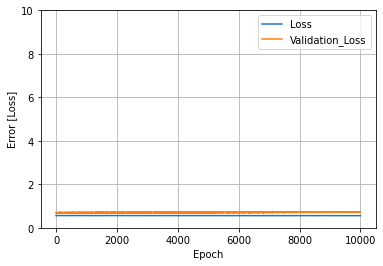

In [ ]:
def sm_plot_loss(history):
  plt.plot(history.history['loss'], label='Loss')
  plt.plot(history.history['val_loss'], label='Validation_Loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Loss]')
  plt.legend()
  plt.grid(True)

sm_plot_loss(history)

# **8. Source Model - Actuals versus Predictions Comparison**

In [ ]:
# Converting probability predictions numpy array into a dataframe

sm_y_pred_df = pd.DataFrame(sm_y_pred, columns=['Score_Status_Probability_Prediction'])
sm_y_pred_df.head()

,Score_Status_Probability_Prediction
0,0.584790
1,0.766999
2,0.334027
3,0.794162
4,0.643063


In [ ]:
sm_y_pred_df['Score_Status_Class_Prediction'] = np.where( sm_y_pred_df['Score_Status_Probability_Prediction'] > 0.5, 1, 0)

print("Missing Values in the New Column 'Score_Status_Probability_Prediction':", sm_y_pred_df['Score_Status_Probability_Prediction'].isna().sum())

print("\n")

# Displaying a sample of 10 random actuals and its respective predictions
sm_y_pred_df.sample(10)

Missing Values in the New Column 'Score_Status_Probability_Prediction': 0




,Score_Status_Probability_Prediction,Score_Status_Class_Prediction
27898,0.303097,0
5350,0.008083,0
57316,0.937550,1
14116,0.791640,1
38266,0.857461,1
13307,0.667170,1
69959,0.874374,1
2192,0.335236,0
68471,0.923041,1
13494,0.244193,0


In [ ]:
# Verifying the Size and the Missing Values (if any) Count of the Score Status Actual (Ground-Truth) Dataframe and the Predictions Dataframe

print(sm_validation_y.shape)
print(sm_y_pred_df.shape)

print("\n")

print(sm_validation_y.isna().sum())
print(sm_y_pred_df.isna().sum())


(83885, 1)
(83885, 2)


score_status    0
dtype: int64
Score_Status_Probability_Prediction    0
Score_Status_Class_Prediction          0
dtype: int64


In [ ]:
# Concatenating the Score Status Actual (Ground-Truth) Dataframe and the Predictions Dataframe

frames = [sm_validation_y, sm_y_pred_df]

sm_results = pd.concat(frames, axis=1)

# Renaming the "score_status" Column Name
sm_results.rename(columns = {'score_status':'Score_Status_Class_Actual'}, inplace = True)

# Displaying a sample of 10 random results
sm_results.sample(10)


,Score_Status_Class_Actual,Score_Status_Probability_Prediction,Score_Status_Class_Prediction
5149,1,0.796518,1
7169,1,0.942906,1
43778,1,0.564429,1
71207,1,0.488566,0
24927,1,0.367843,0
18679,1,0.255964,0
67692,0,0.017323,0
49936,1,0.027133,0
1950,0,0.367913,0
40707,1,0.282098,0


# **9. Exporting a Copy of the Score Status Output Predictions**

In [ ]:
# Exporting a copy of Score Status Actuals and Predictions DataFrame as a csv file

sm_results.to_csv("/content/drive/MyDrive/QMUL_MSc_Project/credit_risk_scoring_project/output/sm_adam_relu_retrain_1_10000_predictions.csv")

print("Data Export Completed")

Data Export Completed


# **10. Source Model - Metrics Report**

In [ ]:
# Source Model - Classificatio Report 

from sklearn.metrics import confusion_matrix, classification_report

sm_classification_report = classification_report(sm_results['Score_Status_Class_Actual'], sm_results['Score_Status_Class_Prediction'])

print(sm_classification_report)

              precision    recall  f1-score   support

           0       0.44      0.57      0.50     27409
           1       0.76      0.65      0.70     56476

    accuracy                           0.62     83885
   macro avg       0.60      0.61      0.60     83885
weighted avg       0.65      0.62      0.63     83885



Text(51.0, 0.5, 'Truth')

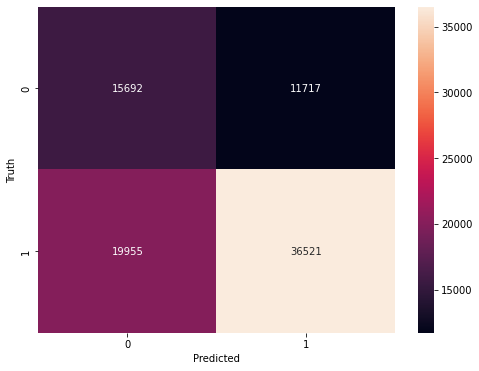

In [ ]:
# Source Model - Confusion Matrix

import seaborn as sn

sm_cm = tf.math.confusion_matrix(labels=sm_results['Score_Status_Class_Actual'], predictions=sm_results['Score_Status_Class_Prediction'])

plt.figure(figsize = (8, 6))
sn.heatmap(sm_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Source Model - ROC, AUC

from sklearn.metrics import roc_auc_score

sm_auc = roc_auc_score(sm_results['Score_Status_Class_Prediction'], sm_results['Score_Status_Class_Prediction'])

print("Source Model ROC AUC: ", sm_auc)

Source Model ROC AUC:  1.0


# **11. Saving the Finalised Source Model - Classification of "score_status"**

In [ ]:
# Saving the Target Model 2 - Classification of "Credit_Default"

from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

sm_model_adam.save('sm_adam_relu_retrain_1_10000_final.h5')

print("Model Saved Successfully")

Model Saved Successfully


In [ ]:
# Target Model 2 Summarisation

sm_model_adam.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f884148c6d0>>

# **12. Saving the Finalised Source Model Weights**

In [ ]:
# Saving the Model Weights

sm_model_adam.save_weights("sm_adam_relu_retrain_1_10000_final_weights")

print("Model Weights Saved Successfully")

Model Weights Saved Successfully
